# Display MLE of Bin Intrinsic Variance

Varying $R_0$ to observe how the MLE of the intrinsic variance in bins changes.  

The plots included in this notebook were generated with the spectroscopic data where using default $R_0$, $z_0$, $U_\odot$, $V_\odot$, $W_\odot$:
   * 0 < r < 15 kpc
   * -1 < z < 1 kpc

In [1]:
import gaia_tools
from gaia_tools.data_analysis import *
from gaia_tools.import_functions import import_data
from gaia_tools import transformation_constants
import matplotlib.pyplot as plt
from gaia_tools.data_plot import *

In [2]:
# DATA IMPORT
path = "../../Gaia Data/MCMC_Input_0_15_-1_1.csv"
data_icrs = import_data(path = path, debug = False)

Start import...
The dimensions of the data: (rows, columns) -> (6660506, 24)
Checking indexing... 



In [7]:
# Return BinCollection with MLE estimates

def get_test_coll(r = 8000, num_r_bin = 10, num_z_bin = 4):
    
    theta = (8000, transformation_constants.Z_0, transformation_constants.V_SUN[0][0],transformation_constants.V_SUN[1][0], transformation_constants.V_SUN[2][0])
    v_sun = np.array([[theta[2]], 
                              [theta[3]], 
                              [theta[4]]])
    
    galcen_data = get_transformed_data(data_icrs, 
                                       include_cylindrical = True, 
                                       r_0 = r,
                                       v_sun = v_sun,
                                       debug = False,
                                       is_bayes = True, 
                                       is_source_included = True)

    cov_df = gaia_tools.covariance_generation.generate_covmatrices(df = data_icrs, 
                                           df_crt = galcen_data, 
                                           transform_to_galcen = True, 
                                           transform_to_cylindrical = True,
                                           z_0 = theta[1],
                                           r_0 = r,
                                           is_bayes = True,
                                           debug=False)
    
    galcen_data['cov_mat'] = cov_df['cov_mat']


    min_val = np.min(galcen_data.r)
    max_val = np.max(galcen_data.r)
    
    min_val_z = np.min(galcen_data.z)
    max_val_z = np.max(galcen_data.z)
    
    # 3
    bin_collection = gaia_tools.data_analysis.get_collapsed_bins(data = galcen_data, 
                                                                 theta = theta, 
                                                                 BL_r_min = min_val - 1, 
                                                                 BL_r_max = max_val + 1, 
                                                                 BL_z_min = -1200, 
                                                                 BL_z_max = 1200, 
                                                                 N_bins = (num_r_bin, num_z_bin),
                                                                 r_drift = False, 
                                                                 debug = False)


    bin_collection.GetMLEParameters()
    
    return bin_collection

---
## Change in summed MLE $\sigma$

This iterates over all the bins at a given $R_0$ and sums together their intrinsic variance.  
The $\sigma_{MLE}$ is not weighted by the amount of stars in the given bin, that is to say,  
the summation below is done over the number of bins in r - z.

In [10]:
def display_MLE_sigma_bins(r_min, r_max):
    
    for i in range(r_min, r_max+1, 2000):
    
        bin_collection = get_test_coll(i)
        
        err_sum = 0
        for bin in bin_collection.bins:
            err_sum += bin.MLE_sigma
            
        print(r"$R_0$ = {0} --> {1}".format(i, err_sum))
    

In [11]:
display_MLE_sigma_bins(6000, 12000)

$R_0$ = 6000 --> 2305.8112935308636
$R_0$ = 8000 --> 2184.5399597286614
$R_0$ = 10000 --> 2451.099811061803
$R_0$ = 12000 --> 2826.219882331326


---
## Display Bins

In [12]:
# Define BinCollection object
bin_collection = get_test_coll(r = 8000)

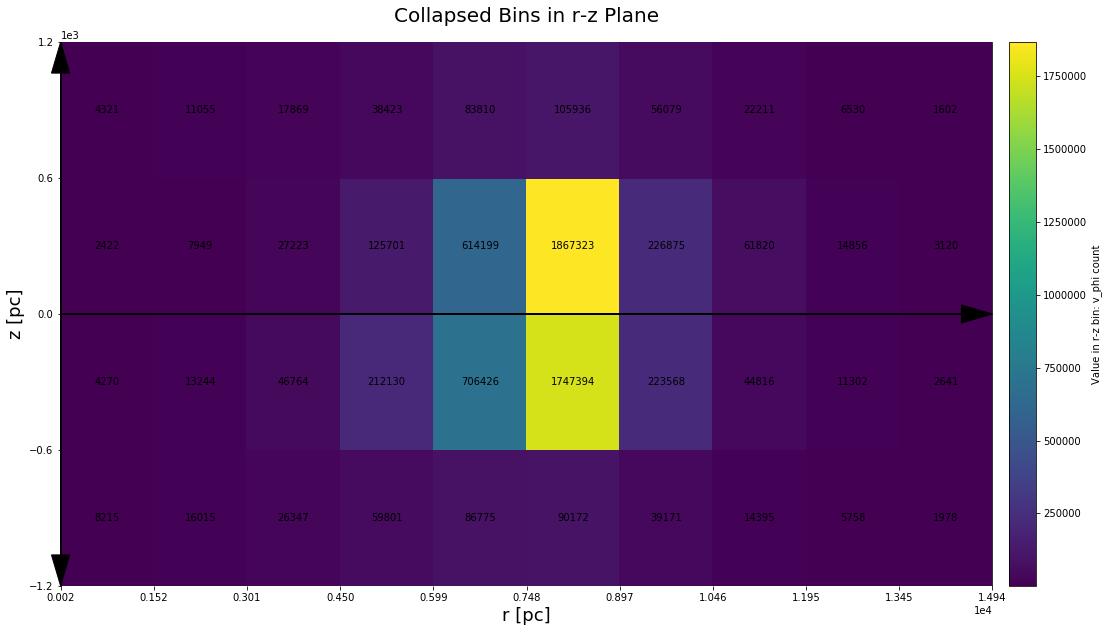

In [13]:
# Plot the bins
plot_collapsed_bins(bin_collection, 'v_phi', showBinValues = True, mode = 'count')

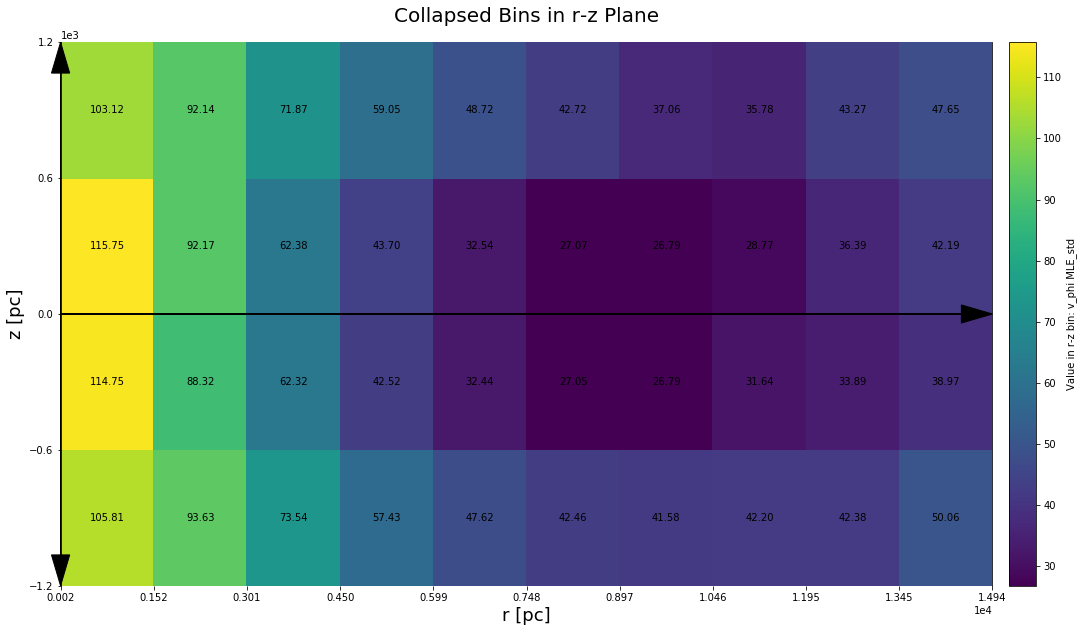

In [14]:
# Plot the bins
plot_collapsed_bins(bin_collection, 'v_phi', showBinValues = True, mode = 'MLE_std')

---